In [1]:
import pandas as pd
data=pd.read_csv('../data/Table1_update.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.loc[data.loc[:,'Aligner'] == 'HISAT2', 'citation_per_year'] = 95

data.loc[data.loc[:,'Indexing'] == 'hashing', 'Index'] = 'Hashing'
data.loc[data.loc[:,'Indexing'] == 'BWT-FM', 'Index'] = 'BWT-FM'
data.loc[data.loc[:,'Indexing'] == 'suffix array', 'Index'] = 'Other Suffix'
data.loc[data.loc[:,'Indexing'] == 'BWT-ST', 'Index'] = 'Other Suffix'
data.loc[data.loc[:,'Indexing'] == 'suffix tree', 'Index'] = 'Other Suffix'

data.loc[data.loc[:,'Pairwise_alignment'] == 'SW', 'Pairwise'] = 'Smith-Waterman'
data.loc[data.loc[:,'Pairwise_alignment'] == 'HD', 'Pairwise'] = 'Hamming Distance'
data.loc[data.loc[:,'Pairwise_alignment'] == 'NW', 'Pairwise'] = 'Needleman-Wunsch'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Non-DP Heuristic', 'Pairwise'] = 'Non-DP Heuristic'
data.loc[data.loc[:,'Pairwise_alignment'] == 'SW & NW', 'Pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'Pairwise_alignment'] == 'SW & Semi-Global', 'Pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Rabin-Karp Algorithm', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Landau-Vishkin', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Sparse DP', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Banded Myers Bit Vector', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Semi-Global', 'Pairwise'] = 'Other DP'

data.loc[data.loc[:,'DP_pairwise'] == 'Y', 'Dynamic Programming'] = 'Yes'
data.loc[data.loc[:,'DP_pairwise'] == 'N', 'Dynamic Programming'] = 'No'

data.loc[data.loc[:,'fix_length_seed'] == 'Y', 'Fixed Length Seed'] = 'Yes'
data.loc[data.loc[:,'fix_length_seed'] == 'N', 'Fixed Length Seed'] = 'No'

data.loc[data.loc[:,'variable_length_seed'] == 'Y', 'Variable Length Seed'] = 'Yes'
data.loc[data.loc[:,'variable_length_seed'] == 'N', 'Variable Length Seed'] = 'No'

data.loc[data.loc[:,'chain_of_seeds'] == 'Y', 'Chain of Seeds'] = 'Yes'
data.loc[data.loc[:,'chain_of_seeds'] == 'N', 'Chain of Seeds'] = 'No'

data.loc[data.loc[:,'spaced_seed'] == 'Y', 'Spaced Seed'] = 'Yes'
data.loc[data.loc[:,'spaced_seed'] == 'N', 'Spaced Seed'] = 'No'

data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,chain_of_seeds,Read_Length,Max_Read_length_tested,Title,Number_of_Citations,...,Spliting_the_read,age,citation_per_year,Index,Pairwise,Dynamic Programming,Fixed Length Seed,Variable Length Seed,Chain of Seeds,Spaced Seed
0,93,2019,deSALT,https://github.com/hitbc/deSALT,Liu et al. 2019,Y,Long,8000 bp,deSALT: fast and accurate long transcriptomic ...,0,...,NaN,1,0.0,Hashing,Smith-Waterman,Yes,Yes,No,Yes,No
1,91,2018,lordFAST,https://github.com/vpc-ccg/lordfast,Haghshenas et al. ‎2018,Y,Long,7kbp = 183.61million/25000,lordFAST: sensitive and Fast Alignment Search ...,2,...,NaN,2,1.0,Hashing,Needleman-Wunsch,Yes,Yes,No,Yes,No
2,92,2018,Magic-BLAST,https://github.com/ncbi/magicblast,Boratyn et al. ‎2018,N,Long,10000-90000,"Magic-BLAST, an accurate DNA and RNA-seq align...",6,...,NaN,2,3.0,Hashing,Smith-Waterman,Yes,Yes,No,No,No
3,89,2018,minimap2,https://github.com/lh3/minimap2,Li et al. ‎2018,Y,Long,Long and Short,Minimap2: pairwise alignment for nucleotide se...,394,...,NaN,2,197.0,Hashing,Needleman-Wunsch,Yes,Yes,No,Yes,No
4,94,2018,MUMmer4,https://github.com/mummer4/mummer,Marçais et al. 2018,Y,Long,Illumina and PacBio,MUMmer4: A fast and versatile genome alignment...,99,...,NaN,2,49.5,Other Suffix,Smith-Waterman,Yes,Yes,No,Yes,No


In [2]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
idx_rt = pd.read_csv('../data/compare.tools.index.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [3]:
data_year = data.loc[:,['Year_of_publication', 'Aligner', 'Application', 'Index', 
                        'Pairwise', 'Dynamic Programming',
                        'Fix Length Seed','Variable Length Seed',
                        'Spaced Seed','Chain of Seeds']]
data_year.loc[:,'aligner_lower'] = data_year.loc[:,'Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt.loc[:,'Tools'].str.lower()
rtyear = pd.merge(rt, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtyear.loc[:,'average_runtime'] = rtyear.iloc[:,1:11].mean(axis=1)
rtyear.loc[:,'std_dev'] = rtyear.iloc[:,1:11].std(axis=1)
rtyear.loc[3,'ERR162843'] = rtyear.loc[3,'average_runtime']
rtyear = rtyear.loc[rtyear.loc[:,'Application'] != 'RNA-Seq']
rtyear.loc[rtyear.loc[:,'Tools'] == 'Bowtie2','Pairwise'] = 'Needleman-Wunsch'
rtyear_summ = rtyear.loc[:,['Tools', 'Year_of_publication', 'average_runtime', 'std_dev', 'Application', 
                            'Index', 'Pairwise',
                            'Dynamic Programming',
                        'Fix Length Seed','Variable Length Seed',
                        'Spaced Seed','Chain of Seeds']]
rtyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    if rtyear.loc[i,'Year_of_publication'] < 2013:
        rtyear.loc[i,'year_split'] = 'Before 2013'  
    else:
        rtyear.loc[i,'year_split'] = '2013 and later'
rtyear_new = pd.melt(rtyear, id_vars = ['Tools', 'year_split', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtyear.to_csv(path_or_buf='../data/runtime_comparison_with_tool_info.csv')
rtyear

/Users/jrotman/anaconda2/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,...,Pairwise,Dynamic Programming,Fix Length Seed,Variable Length Seed,Spaced Seed,Chain of Seeds,aligner_lower,average_runtime,std_dev,year_split
0,Bowtie2,2.364914,4.442126,6.125343,9.481851,4.480202,6.579199,5.183426,4.279699,2.942086,...,Needleman-Wunsch,Yes,NaN,No,No,Yes,bowtie2,4.973138,2.040406,Before 2013
1,Bowtie,3.358317,5.825385,8.749844,12.251327,6.041617,7.729104,5.987389,4.563028,1.797393,...,Hamming Distance,No,NaN,No,No,No,bowtie,6.102213,2.942134,Before 2013
2,BWA,4.048227,6.964193,8.374950,10.337639,5.155173,7.040740,6.394736,4.827655,3.171607,...,Smith-Waterman,Yes,NaN,Yes,No,No,bwa,6.239311,2.106996,Before 2013
3,ERNE,2.066056,5.475683,9.406134,13.734103,8.755687,8.281991,11.730733,8.590035,7.333813,...,Hamming Distance,No,NaN,No,No,No,erne,8.281991,3.378498,2013 and later
4,gsnap,18.782465,29.469896,40.606409,34.717148,11.450009,17.150793,16.579589,13.286443,10.444190,...,Non-DP Heuristic,No,NaN,No,No,Yes,gsnap,20.924469,10.347573,Before 2013
5,hisat2,0.582257,2.636554,1.459196,1.739013,0.778033,1.107651,0.944994,0.820202,0.604172,...,Non-DP Heuristic,No,NaN,No,No,No,hisat2,1.158713,0.634037,2013 and later
6,last,10.140177,16.316454,27.292700,27.709176,23.393876,34.322943,17.217662,14.567814,13.563960,...,Smith-Waterman,Yes,NaN,Yes,No,Yes,last,20.221401,7.627339,Before 2013
7,minimap2,0.955566,1.781175,3.408856,2.273320,1.625731,2.278983,1.980141,1.624609,1.086941,...,Needleman-Wunsch,Yes,NaN,No,No,Yes,minimap2,1.866426,0.694104,2013 and later
8,rmap,7.669205,10.087773,14.721393,21.384636,13.965002,17.182582,12.655798,9.048157,10.189939,...,Hamming Distance,No,NaN,No,No,No,rmap,12.950420,4.114427,Before 2013
9,smalt,12.295481,26.736237,47.018981,60.391744,29.646617,38.529345,33.415141,27.376229,16.051896,...,Smith-Waterman,Yes,NaN,No,No,Yes,smalt,32.163790,14.049867,Before 2013


In [4]:
data_cite = data.loc[:,['citation_per_year', 'Aligner', 'Application', 'Index', 'Pairwise']]
data_cite.loc[:,'aligner_lower'] = data_cite['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtcite = pd.merge(rt, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtcite.loc[:,'average_runtime'] = rtcite.iloc[:,1:11].mean(axis=1)
rtcite.loc[:,'std_dev_rt'] = rtcite.iloc[:,1:11].std(axis=1)
rtcite.loc[3,'ERR162843'] = rtcite.loc[3,'average_runtime']
rtcite = rtcite.loc[rtcite.loc[:,'Application'] != 'RNA-Seq']
rtcite_new = pd.melt(rtcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtcite_summ = rtcite.loc[:,['Tools', 'citation_per_year', 'average_runtime', 'std_dev_rt', 
                            'Application', 'Index', 'Pairwise']]
rtcite_summ

,Tools,citation_per_year,average_runtime,std_dev_rt,Application,Index,Pairwise
0,Bowtie2,2010.125000,4.973138,2.040406,DNA,BWT-FM,Multiple Methods
1,Bowtie,1353.636364,6.102213,2.942134,DNA,BWT-FM,Hamming Distance
2,BWA,1831.181818,6.239311,2.106996,DNA,BWT-FM,Smith-Waterman
3,ERNE,2.250000,8.281991,3.378498,DNA,Hashing,Hamming Distance
4,gsnap,154.900000,20.924469,10.347573,DNA,Hashing,Non-DP Heuristic
5,hisat2,95.000000,1.158713,0.634037,DNA,BWT-FM,Non-DP Heuristic
6,last,62.777778,20.221401,7.627339,DNA,Other Suffix,Smith-Waterman
7,minimap2,197.000000,1.866426,0.694104,DNA/RNA-Seq,Hashing,Needleman-Wunsch
8,rmap,32.083333,12.950420,4.114427,DNA,Hashing,Hamming Distance
9,smalt,2.700000,32.163790,14.049867,DNA,Hashing,Smith-Waterman


In [5]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memyear = pd.merge(mem, data_year, left_on='tools_lower', right_on='aligner_lower', how='inner')
memyear.loc[:,'average_memory'] = memyear.iloc[:,1:11].mean(axis=1)
memyear = memyear.loc[memyear.loc[:,'Application'] != 'RNA-Seq']
memyear.loc[memyear.loc[:,'Tools'] == 'Bowtie2','Pairwise'] = 'Needleman-Wunsch'
memyear_summ = memyear.loc[:,['Tools', 'Year_of_publication', 'average_memory', 'Application', 'Index', 
                             'Pairwise', 'Dynamic Programming',
                        'Fix Length Seed','Variable Length Seed',
                        'Spaced Seed','Chain of Seeds']]
memyear_summ.sort_values(by=['Year_of_publication'], inplace=True)
for i in range(0,11):
    memyear.loc[i,'year_split'] = 'Before 2013' if memyear.loc[i,'Year_of_publication'] < 2013 else '2013 and later'
memyear_new = pd.melt(memyear, id_vars = ['Tools', 'year_split', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memyear.to_csv(path_or_buf='../data/memory_comparison_with_tool_info.csv')
memyear

,Tools,ERR009309,ERR013127,ERR013138,ERR045708,ERR050158,ERR162843,ERR181410,ERR183377,SRR061640,...,Index,Pairwise,Dynamic Programming,Fix Length Seed,Variable Length Seed,Spaced Seed,Chain of Seeds,aligner_lower,average_memory,year_split
0,Bowtie2,3.580,3.580,3.580,3.579,3.580,3.580,3.580,3.580,3.580,...,BWT-FM,Needleman-Wunsch,Yes,NaN,No,No,Yes,bowtie2,3.5799,Before 2013
1,Bowtie,3.194,3.194,3.194,3.194,3.194,3.194,3.194,3.194,3.194,...,BWT-FM,Hamming Distance,No,NaN,No,No,No,bowtie,3.1940,Before 2013
2,BWA,5.564,5.649,5.515,5.564,7.127,5.516,5.516,5.516,5.627,...,BWT-FM,Smith-Waterman,Yes,NaN,Yes,No,No,bwa,5.7110,Before 2013
3,ERNE,4.841,5.712,4.841,5.712,5.712,5.712,5.712,5.156,5.712,...,Hashing,Hamming Distance,No,NaN,No,No,No,erne,5.3951,2013 and later
4,gsnap,28.060,27.963,31.837,28.149,28.807,28.213,28.336,27.997,27.899,...,Hashing,Non-DP Heuristic,No,NaN,No,No,Yes,gsnap,28.8536,Before 2013
5,hisat2,4.694,4.694,4.694,4.695,4.694,4.694,4.694,4.694,4.694,...,BWT-FM,Non-DP Heuristic,No,NaN,No,No,No,hisat2,4.6941,2013 and later
6,last,15.359,15.357,15.359,15.357,15.367,15.358,15.358,15.358,15.358,...,Other Suffix,Smith-Waterman,Yes,NaN,Yes,No,Yes,last,15.3589,Before 2013
7,minimap2,12.422,12.360,12.431,12.551,12.965,12.308,12.364,12.403,12.358,...,Hashing,Needleman-Wunsch,Yes,NaN,No,No,Yes,minimap2,12.4488,2013 and later
8,rmap,6.895,9.359,10.524,13.982,8.660,10.146,9.268,8.444,8.538,...,Hashing,Hamming Distance,No,NaN,No,No,No,rmap,9.5320,Before 2013
9,smalt,3.675,3.676,3.675,3.677,3.677,3.676,3.677,3.677,3.678,...,Hashing,Smith-Waterman,Yes,NaN,No,No,Yes,smalt,3.6766,Before 2013


In [6]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memcite = pd.merge(mem, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
memcite.loc[:,'average_memory'] = memcite.iloc[:,1:11].mean(axis=1)
memcite.loc[:,'std_dev_mem'] = memcite.iloc[:,1:11].std(axis=1)
memcite = memcite.loc[memcite.loc[:,'Application'] != 'RNA-Seq']
memcite_new = pd.melt(memcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memcite_summ = memcite.loc[:,['Tools', 'citation_per_year', 'average_memory', 'std_dev_mem', 
                              'Application', 'Index', 'Pairwise']]
memcite_summ

,Tools,citation_per_year,average_memory,std_dev_mem,Application,Index,Pairwise
0,Bowtie2,2010.125000,3.5799,0.000316,DNA,BWT-FM,Multiple Methods
1,Bowtie,1353.636364,3.1940,0.000000,DNA,BWT-FM,Hamming Distance
2,BWA,1831.181818,5.7110,0.499966,DNA,BWT-FM,Smith-Waterman
3,ERNE,2.250000,5.3951,0.419100,DNA,Hashing,Hamming Distance
4,gsnap,154.900000,28.8536,1.453301,DNA,Hashing,Non-DP Heuristic
5,hisat2,95.000000,4.6941,0.000316,DNA,BWT-FM,Non-DP Heuristic
6,last,62.777778,15.3589,0.002923,DNA,Other Suffix,Smith-Waterman
7,minimap2,197.000000,12.4488,0.193869,DNA/RNA-Seq,Hashing,Needleman-Wunsch
8,rmap,32.083333,9.5320,1.860403,DNA,Hashing,Hamming Distance
9,smalt,2.700000,3.6766,0.001075,DNA,Hashing,Smith-Waterman


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
import numpy as np

tool_clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'mediumpurple', 'gold', 'aquamarine', 
        'hotpink', 'wheat', 'gray', 'darksalmon']

index_clrs = ['tomato', 'lightgreen', 'lightblue' ]

local_clrs = ['y', 'lightslategray', 'indianred', 'saddlebrown', 'lightseagreen', 'darkmagenta']

order_by_year = ["rmap", "Bowtie", "BWA", "gsnap", "smalt", "last", "snap", "Bowtie2", "hisat2", "ERNE", "minimap2"]

sns.set_style('white')
sns.set_context('talk')

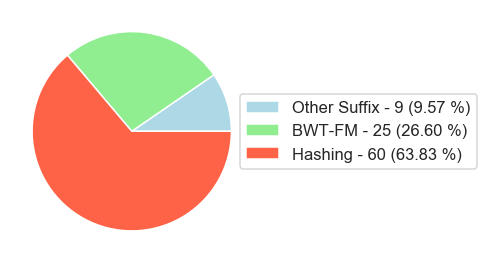

In [11]:
plt.figure(figsize=(11,4))
idx_group = data_year.groupby('Index').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(idx_group.Aligner, colors=index_clrs[::-1])
pct = 100.*idx_group.Aligner/idx_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(idx_group.index, idx_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(.9, .5))
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Indexing_Pie.png')
plt.savefig('../figures/Indexing_Pie.pdf')

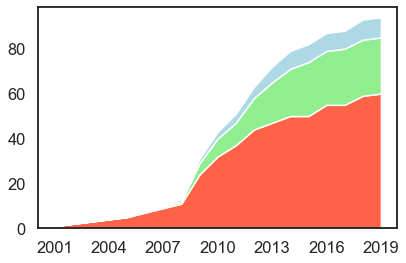

In [12]:
by_year = data_year.groupby(['Year_of_publication','Index']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index
by_year

plt.stackplot(x, by_year.loc[:,'Hashing'], by_year.loc[:,'BWT-FM'], by_year.loc[:,'Other Suffix'], 
              labels=['Hashing','BWT-FM','Other Suffix'], colors=index_clrs)
#plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 3))
#plt.show()

plt.tight_layout()
plt.savefig('../figures/Indexing_over_Time.png')
plt.savefig('../figures/Indexing_over_Time.pdf')

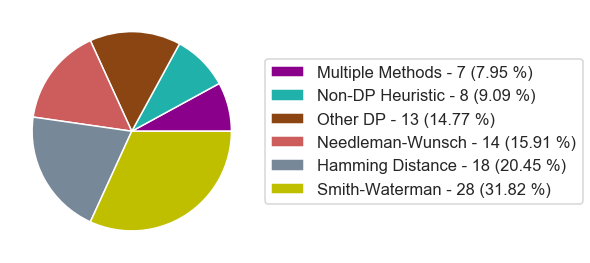

In [19]:
plt.figure(figsize=(12,4))

pairwise_group = data_year.groupby('Pairwise').count().sort_values('Aligner', ascending=True)
patches, texts = plt.pie(pairwise_group.Aligner, colors=local_clrs[::-1])
pct = 100.*pairwise_group.Aligner/pairwise_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(pairwise_group.index, pairwise_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Local_Pie.png')
plt.savefig('../figures/Local_Pie.pdf')

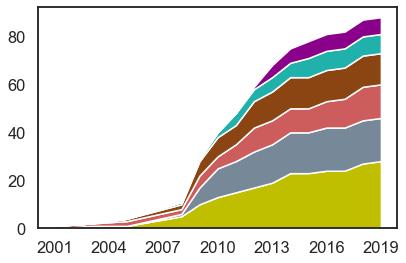

In [21]:
by_year = data_year.groupby(['Year_of_publication','Pairwise']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Smith-Waterman'], by_year.loc[:,'Hamming Distance'], 
              by_year.loc[:,'Needleman-Wunsch'], by_year.loc[:,'Other DP'], 
              by_year.loc[:,'Non-DP Heuristic'], by_year.loc[:,'Multiple Methods'],
              labels=['Smith-Waterman', 'Hamming Distance', 'Needleman-Wunsch', 'Other DP',
                      'Non-DP Heuristic', 'Multiple Methods'], colors=local_clrs)
#plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xticks(range(min(x), max(x)+1, 3))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Local_over_Time.png')
plt.savefig('../figures/Local_over_Time.pdf')

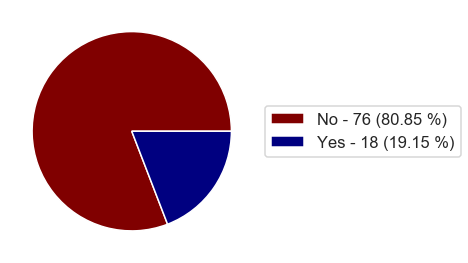

In [27]:
plt.figure(figsize=(12,4))

VLS_group = data_year.groupby('Variable Length Seed').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(VLS_group.Aligner, colors=['maroon', 'navy'])
pct = 100.*VLS_group.Aligner/VLS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(VLS_group.index, VLS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/VLS_Pie.png')
plt.savefig('../figures/VLS_Pie.pdf')

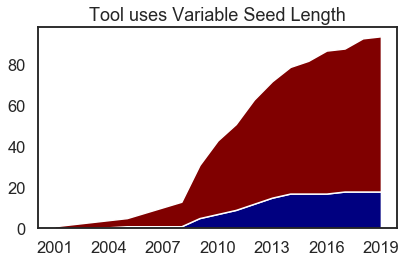

In [33]:
by_year = data_year.groupby(['Year_of_publication','Variable Length Seed']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=['navy','maroon'])

plt.xticks(range(min(x), max(x)+1, 3))
plt.title('Tool uses Variable Seed Length')
plt.tight_layout()

#plt.show()
plt.savefig('../figures/VLS_over_Time.png')
plt.savefig('../figures/VLS_over_Time.pdf')

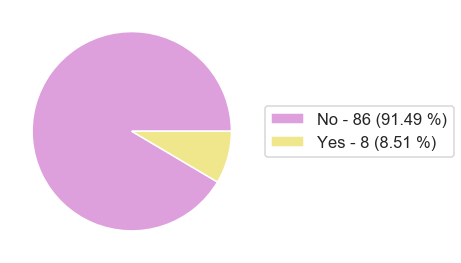

In [31]:
plt.figure(figsize=(12,4))

SS_group = data_year.groupby('Spaced Seed').count().sort_values('Aligner', ascending=False)
patches, texts = plt.pie(SS_group.Aligner, colors=['plum','khaki'])
pct = 100.*SS_group.Aligner/SS_group.Aligner.sum()
labels = ['{0} - {1} ({2:2.2f} %)'.format(i,j,k) for i,j,k in zip(SS_group.index, SS_group.Aligner, pct)]
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/SS_Pie.png')
plt.savefig('../figures/SS_Pie.pdf')

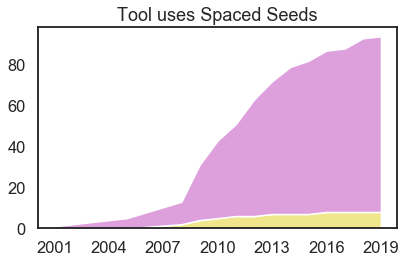

In [32]:
by_year = data_year.groupby(['Year_of_publication','Spaced Seed']).count()
by_year = by_year.xs('Aligner', axis=1)
by_year = by_year.unstack(level = -1, fill_value=0)
by_year = by_year.cumsum()
x = by_year.index

plt.stackplot(x, by_year.loc[:,'Yes'], by_year.loc[:,'No'],
              labels=['Yes', 'No'], colors=['khaki','plum'])

plt.xticks(range(min(x), max(x)+1, 3))
plt.title('Tool uses Spaced Seeds')
plt.tight_layout()

#plt.show()
plt.savefig('../figures/SS_over_Time.png')
plt.savefig('../figures/SS_over_Time.pdf')

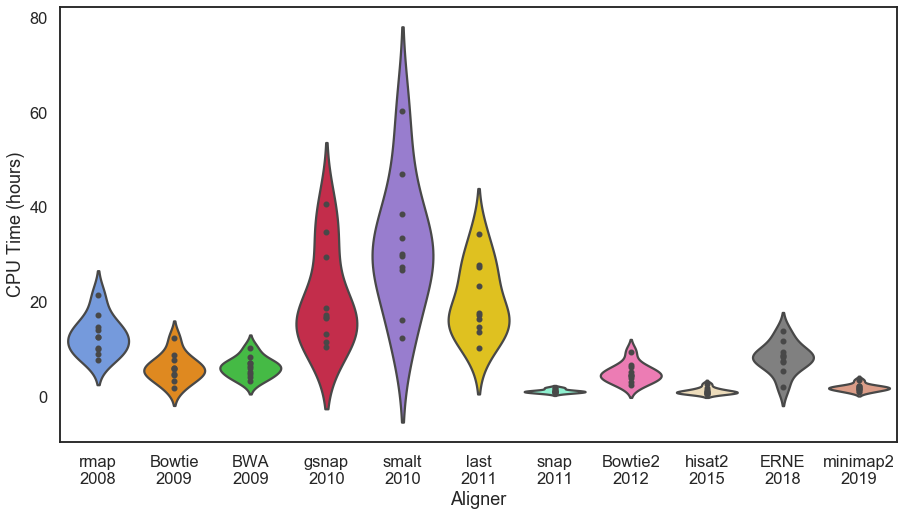

In [36]:
plt.figure(figsize=(15,8))
my_order = rtyear_new.groupby(by='Tools')[["runtime"]].median()
my_order = my_order.sort_values(by='runtime').index
ax = sns.violinplot(data = rtyear_new, x = 'Tools', y = 'runtime', scale='width', palette=tool_clrs,# color = "grey"
                   order = order_by_year, inner='points')
ax.set(xlabel = 'Aligner', ylabel = 'CPU Time (hours)')
ax.set_xticklabels(#rotation=40, ha="right", 
                   labels=["rmap\n2008", "Bowtie\n2009", "BWA\n2009", "gsnap\n2010", "smalt\n2010", "last\n2011", 
                           "snap\n2011", "Bowtie2\n2012", "hisat2\n2015", "ERNE\n2018", "minimap2\n2019"])

#plt.show()
plt.savefig('../figures/Runtime_by_Tool.png')
plt.savefig('../figures/Runtime_by_Tool.pdf')

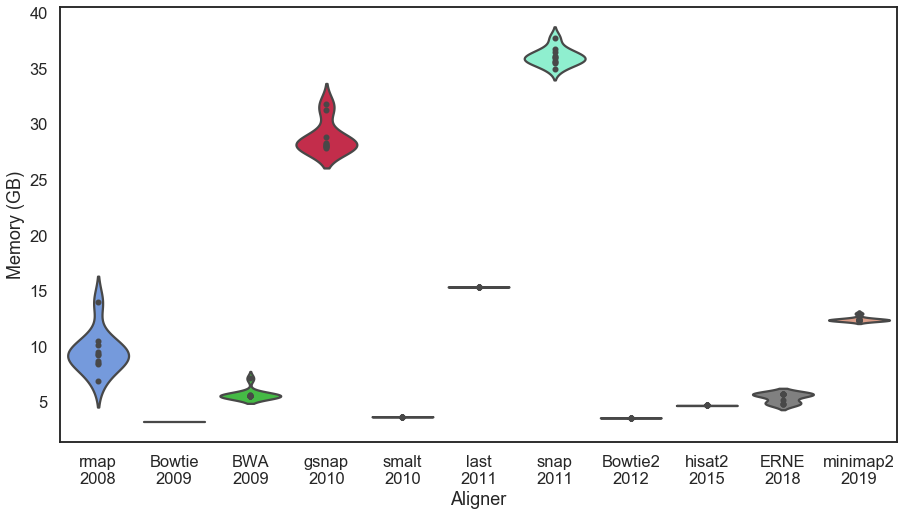

In [37]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(data = memyear_new, x = 'Tools', y = 'memory', scale='width', palette=tool_clrs,# color="grey",
                    order=order_by_year, inner='points')
ax.set(xlabel = 'Aligner', ylabel = 'Memory (GB)')
ax.set_xticklabels(#rotation=40, ha="right", 
                   labels=["rmap\n2008", "Bowtie\n2009", "BWA\n2009", "gsnap\n2010", "smalt\n2010", "last\n2011", 
                           "snap\n2011", "Bowtie2\n2012", "hisat2\n2015", "ERNE\n2018", "minimap2\n2019"])

#plt.show()
plt.savefig('../figures/Memory_by_Tool.png')
plt.savefig('../figures/Memory_by_Tool.pdf')

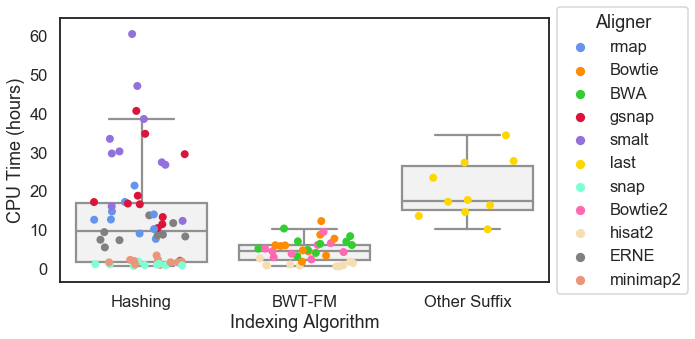

In [38]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data = rtyear_new, x = 'Index', y = 'runtime', order=['Hashing','BWT-FM','Other Suffix'], 
                 color=".95", fliersize = 0)
ax = sns.stripplot(data = rtyear_new, x = 'Index', y = 'runtime', order=['Hashing','BWT-FM','Other Suffix'],
                   palette=tool_clrs, hue="Tools", hue_order=order_by_year, size=8, jitter=.3)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'CPU Time (hours)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))

plt.tight_layout()
#plt.show()
plt.savefig('../figures/Runtime_by_Index_box.png')
plt.savefig('../figures/Runtime_by_Index_box.pdf')

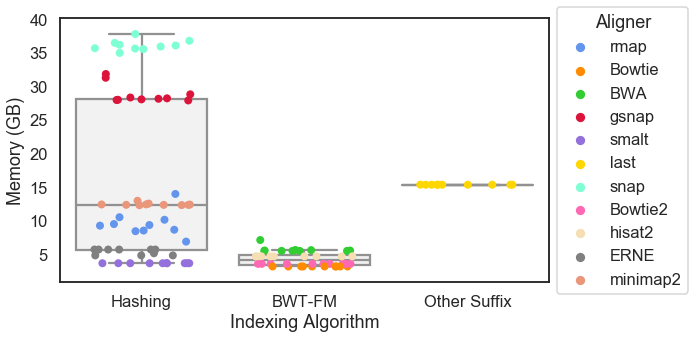

In [39]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data = memyear_new, x = 'Index', y = 'memory', order=['Hashing','BWT-FM','Other Suffix'],
                 color=".95", fliersize=0)
ax = sns.stripplot(data = memyear_new, x = 'Index', y = 'memory', order=['Hashing','BWT-FM','Other Suffix'],
                  palette=tool_clrs, hue="Tools", hue_order=order_by_year, size=8, jitter=.3)
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Memory (GB)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Index_box.png')
plt.savefig('../figures/Memory_by_Index_box.pdf')

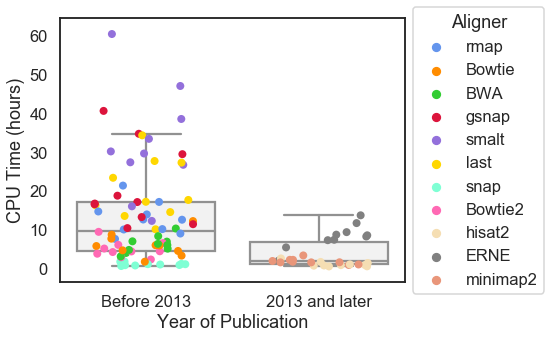

In [40]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data = rtyear_new, x = 'year_split', y = 'runtime',
                 order = ['Before 2013', '2013 and later'], color=".95", fliersize = 0)
ax = sns.stripplot(data= rtyear_new, x = 'year_split', y = 'runtime', order=['Before 2013','2013 and later'],
                   palette=tool_clrs, hue="Tools", hue_order=order_by_year, size=8, jitter=.3)
ax.set(xlabel = 'Year of Publication', ylabel = 'CPU Time (hours)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()

#plt.show()
plt.savefig('../figures/Runtime_by_Year_box.png')
plt.savefig('../figures/Runtime_by_Year_box.pdf')

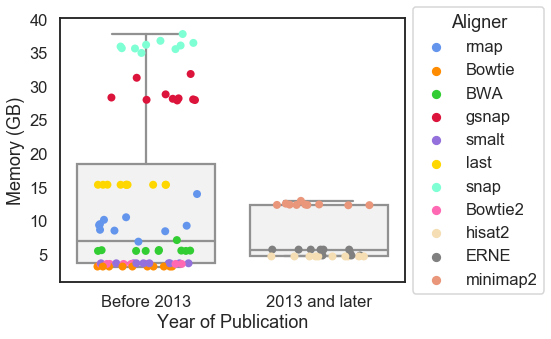

In [41]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(data = memyear_new, x = 'year_split', y = 'memory', 
                 order = ['Before 2013', '2013 and later'], color=".95")
ax = sns.stripplot(data = memyear_new, x = 'year_split', y = 'memory', order=['Before 2013','2013 and later'],
                   palette=tool_clrs, hue="Tools", hue_order=order_by_year, size=8, jitter=.3)
ax.set(xlabel = 'Year of Publication', ylabel = 'Memory (GB)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Year_box.png')
plt.savefig('../figures/Memory_by_Year_box.pdf')

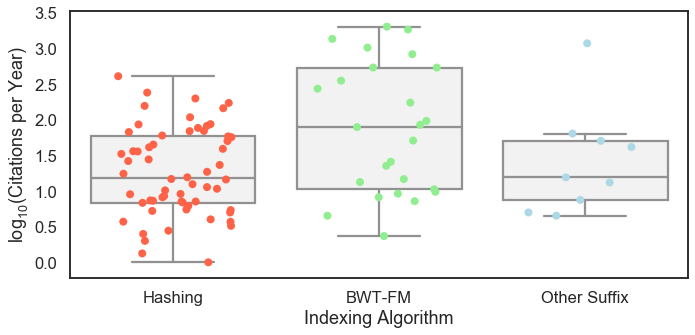

In [34]:
plt.figure(figsize=(10,5))

data_cite['log_citations'] = np.log10(data_cite['citation_per_year']+1)
ax = sns.boxplot(data=data_cite, x='Index', y='log_citations', 
                 order=['Hashing','BWT-FM','Other Suffix'], color=".95", fliersize=0)
ax = sns.stripplot(data = data_cite, x = 'Index', y = 'log_citations', 
                   order=['Hashing','BWT-FM','Other Suffix'], palette=index_clrs, size=8, jitter=.3)
ax.set(xlabel = 'Indexing Algorithm', ylabel = "$\mathregular{log_{10}}$(Citations per Year)")
#ax.set_xticklabels(rotation=40, ha="right")
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Indexing_by_Citations_box.png')
plt.savefig('../figures/Indexing_by_Citations_box.pdf')

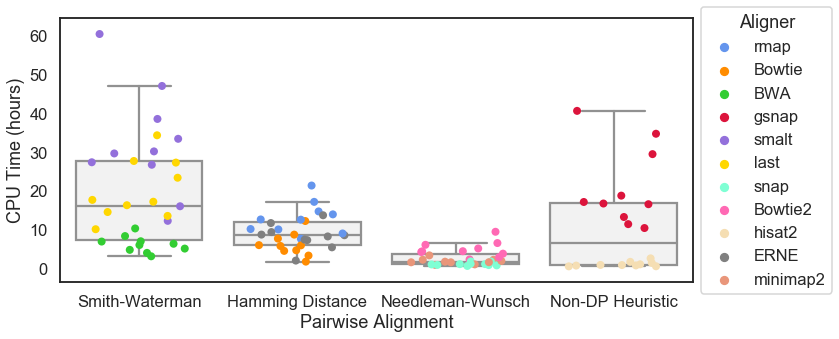

In [42]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data = rtyear_new, x = 'Pairwise', y = 'runtime', 
                 order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'], 
                 fliersize=0, color=".95")
                 #hue = 'Index', hue_order = ['Hashing', 'BWT-FM', 'Suffix Array'], palette=clrs) 
                 #legend=False, kind = 'box')
ax = sns.stripplot(data = rtyear_new, x = 'Pairwise', y = 'runtime', 
                   order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'],
                   hue="Tools", hue_order=order_by_year, palette=tool_clrs, size=8, jitter=.3)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'CPU Time (hours)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))

plt.tight_layout()
#plt.show()

plt.savefig('../figures/Runtime_by_Local_box.png')
plt.savefig('../figures/Runtime_by_Local_box.pdf')

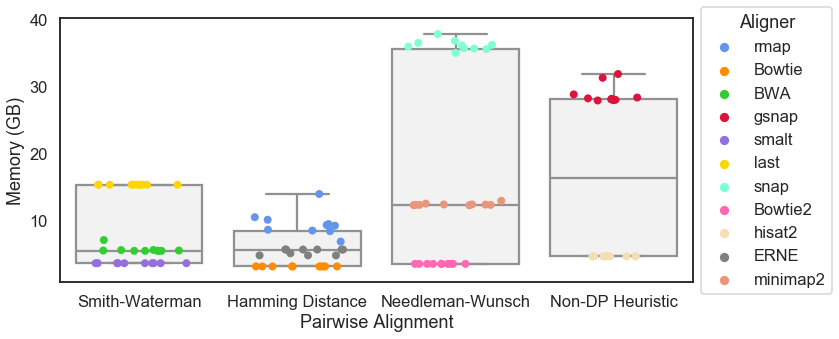

In [43]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data = memyear_new, x = 'Pairwise', y = 'memory',
                 order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'], 
                 #hue = 'Index', hue_order = ['Hashing', 'BWT-FM', 'Suffix Array'], 
                 color=".95", fliersize=0) 
ax = sns.stripplot(data = memyear_new, x = 'Pairwise', y = 'memory', 
                   order=['Smith-Waterman','Hamming Distance','Needleman-Wunsch','Non-DP Heuristic'],
                   hue="Tools", hue_order=order_by_year, palette=tool_clrs, size=8, jitter=.3)
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Memory (GB)')
leg = plt.legend(title='Aligner', loc='center left', bbox_to_anchor=(1, .5))
plt.tight_layout()
#plt.show()

plt.savefig('../figures/Memory_by_Local_box.png')
plt.savefig('../figures/Memory_by_Local_box.pdf')

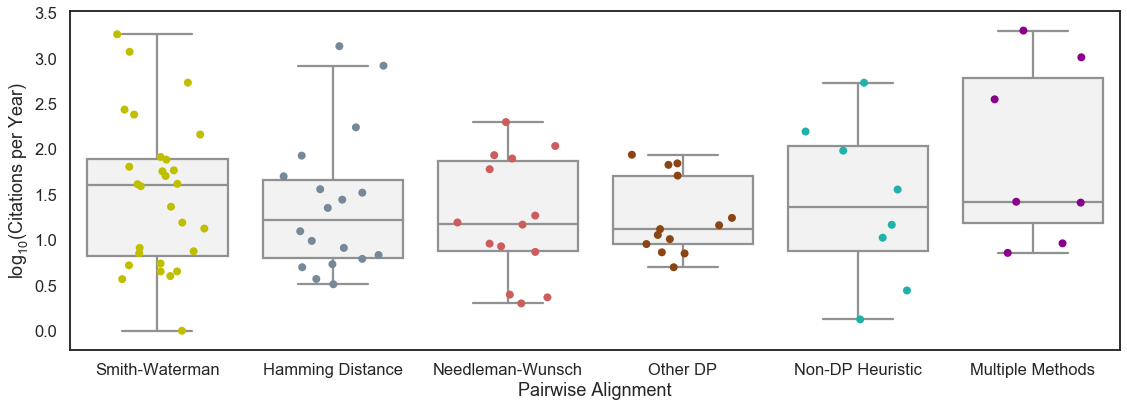

In [35]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=data_cite, x='Pairwise', y='log_citations',  
                order=['Smith-Waterman', 'Hamming Distance', 'Needleman-Wunsch', 'Other DP', 'Non-DP Heuristic',
                     'Multiple Methods'], color=".95", fliersize=0)
ax = sns.stripplot(data=data_cite, x='Pairwise', y='log_citations',  
                order=['Smith-Waterman', 'Hamming Distance', 'Needleman-Wunsch', 'Other DP', 'Non-DP Heuristic',
                     'Multiple Methods'], palette=local_clrs, size=8, jitter=.3)
ax.set(xlabel = 'Pairwise Alignment', ylabel = "$\mathregular{log_{10}}$(Citations per Year)")
plt.tight_layout()
#ax.set_xticklabels(rotation=40, ha="right")
#plt.show()
plt.savefig('../figures/Local_by_Citations_box.png')
plt.savefig('../figures/Local_by_Citations_box.pdf')